In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train = pd.read_csv('Train.csv')

In [72]:
test = pd.read_csv('Test.csv')

# EDA

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [75]:
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [76]:
test

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
...,...,...
5107,23395,26-04-2015 19:00
5108,23396,26-04-2015 20:00
5109,23397,26-04-2015 21:00
5110,23398,26-04-2015 22:00


In [77]:
train.duplicated(subset=['Datetime']).sum()

0

In [78]:
train['Datetime'] = pd.to_datetime(train['Datetime'])

In [79]:
test['Datetime'] = pd.to_datetime(test['Datetime'])

In [80]:
train['year'] = train['Datetime'].dt.year

In [81]:
train['month'] = train['Datetime'].dt.month

In [82]:
train['day'] = train['Datetime'].dt.day

In [83]:
train['hour'] = train['Datetime'].dt.hour

In [84]:
test['year'] = test['Datetime'].dt.year

In [85]:
test['month'] = test['Datetime'].dt.month

In [86]:
test['day'] = test['Datetime'].dt.day

In [87]:
test['hour'] = test['Datetime'].dt.hour

<Axes: xlabel='Datetime', ylabel='Count'>

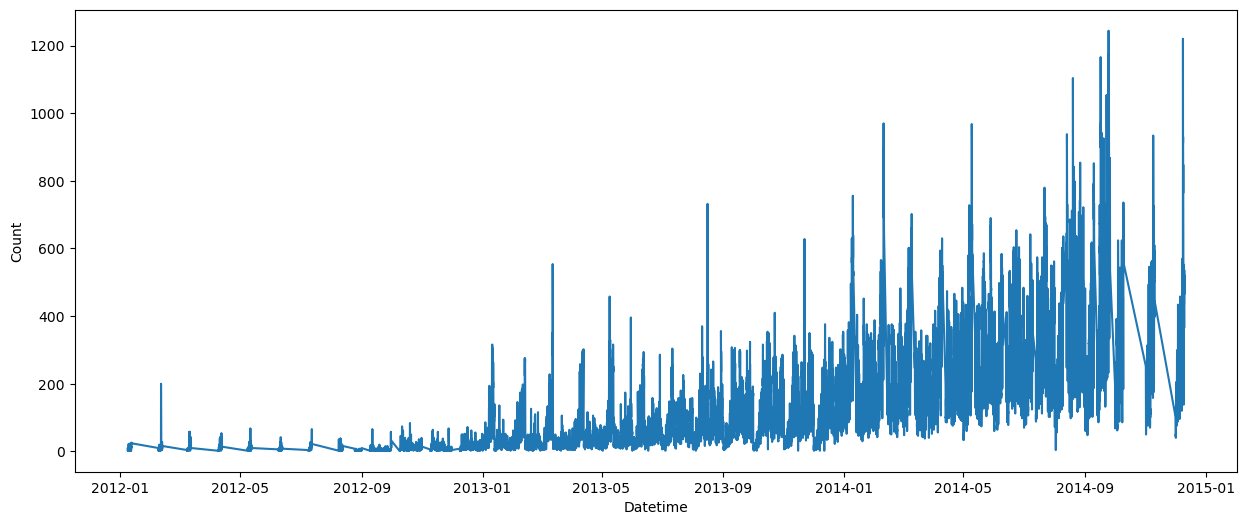

In [88]:
plt.figure(figsize=(15,6))
sns.lineplot(data=train, x='Datetime', y='Count')

## group by date

In [89]:
by_date = train.groupby('Datetime').agg({'Datetime':'count', 'Count':'mean'})

In [90]:
by_date

,Datetime,Count
Datetime,,
2012-01-09 00:00:00,1,8.0
2012-01-09 01:00:00,1,4.0
2012-01-09 02:00:00,1,4.0
2012-01-09 03:00:00,1,2.0
2012-01-09 04:00:00,1,2.0
...,...,...
2014-12-09 19:00:00,1,536.0
2014-12-09 20:00:00,1,484.0
2014-12-09 21:00:00,1,368.0


### mean demand

<Axes: xlabel='Datetime', ylabel='Count'>

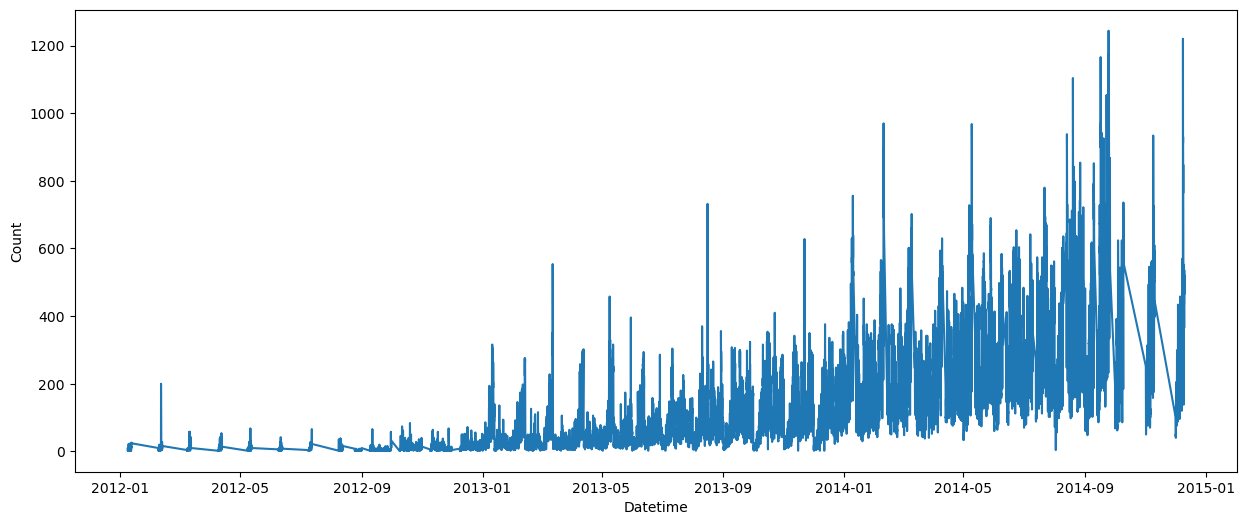

In [91]:
plt.figure(figsize=(15,6))
sns.lineplot(data=by_date, x=by_date.index, y='Count')

## group by hour

In [92]:
by_hour = train.groupby('hour').agg({'Count':'mean'})

### mean demand by hour

<Axes: xlabel='hour', ylabel='Count'>

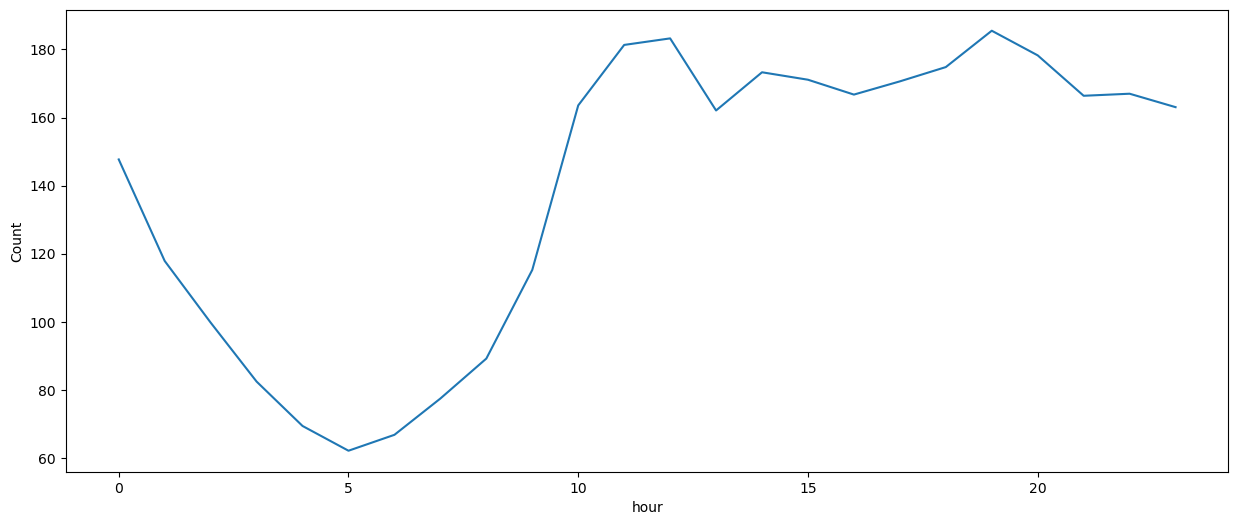

In [93]:
plt.figure(figsize=(15,6))
sns.lineplot(data=by_hour, x=by_hour.index, y='Count')

In [94]:
train

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22


# pre-processing

In [95]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [96]:
from sktime.forecasting.base import ForecastingHorizon

## reindexing

In [97]:
train

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22


In [98]:
train.set_index('Datetime', inplace=True)

In [99]:
train_all = train.reindex(pd.date_range(train.index.min(), train.index.max(), freq='H'))

In [100]:
train_all.shape

(25584, 6)

In [101]:
train_all['year'] = train_all.index.year

In [102]:
train_all['month'] = train_all.index.month

In [103]:
train_all['day'] = train_all.index.day

In [104]:
train_all['hour'] = train_all.index.hour

In [105]:
train_all['Count'].isna().sum()

7296

In [106]:
train_all.groupby('year')['month'].count()

year
2012    8592
2013    8760
2014    8232
Name: month, dtype: int64

In [107]:
train_all.groupby('year')['Count'].count()

year
2012    3096
2013    8760
2014    6432
Name: Count, dtype: int64

In [108]:
train_all[train_all['year']==2012]['Count'].isna().sum()

5496

In [109]:
train_all[train_all['year']==2013]['Count'].isna().sum()

0

In [110]:
train_all[train_all['year']==2014]['Count'].isna().sum()

1800

<Axes: ylabel='Count'>

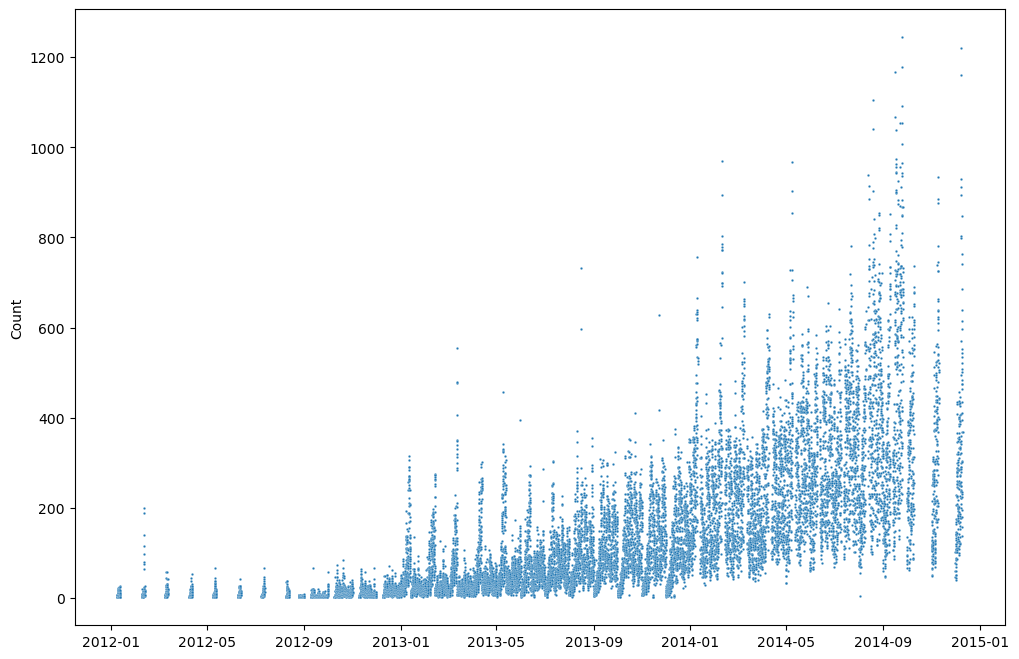

In [111]:
plt.figure(figsize=(12,8))
sns.scatterplot(train_all['Count'], s=3)

<Axes: ylabel='Count'>

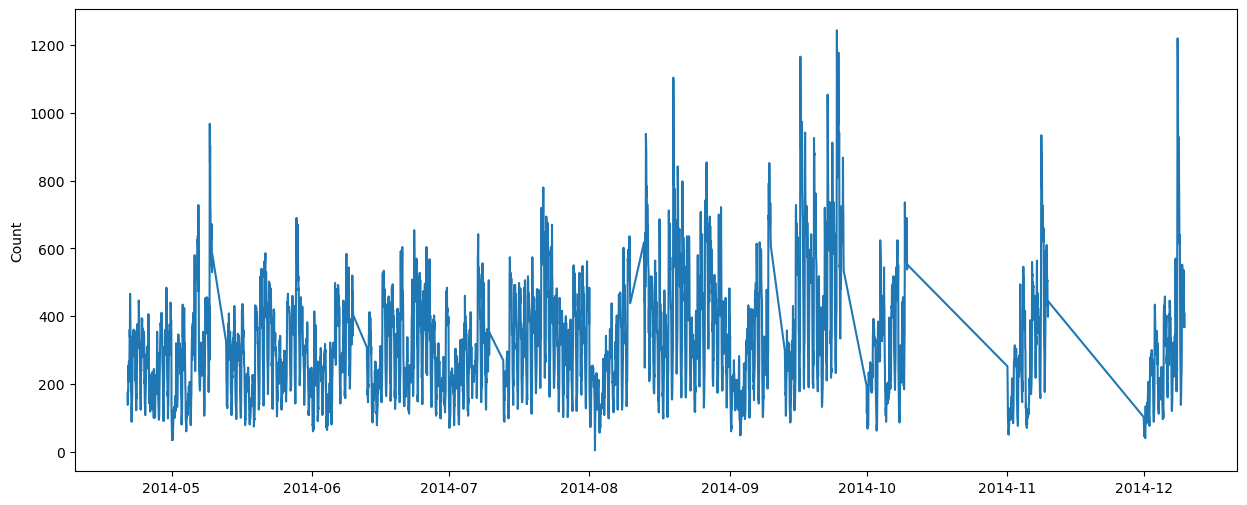

In [112]:
plt.figure(figsize=(15,6))
sns.lineplot(data=train_all['Count'][20000:])

In [42]:
train_all[train_all['year']==2014][train_all[train_all['year']==2014]['Count'].isna()]

,ID,Count,year,month,day,hour
2014-01-10 00:00:00,NaN,NaN,2014,1,10,0
2014-01-10 01:00:00,NaN,NaN,2014,1,10,1
2014-01-10 02:00:00,NaN,NaN,2014,1,10,2
2014-01-10 03:00:00,NaN,NaN,2014,1,10,3
2014-01-10 04:00:00,NaN,NaN,2014,1,10,4
...,...,...,...,...,...,...
2014-11-30 19:00:00,NaN,NaN,2014,11,30,19
2014-11-30 20:00:00,NaN,NaN,2014,11,30,20
2014-11-30 21:00:00,NaN,NaN,2014,11,30,21
2014-11-30 22:00:00,NaN,NaN,2014,11,30,22


In [43]:
train_all

,ID,Count,year,month,day,hour
2012-01-09 00:00:00,168.0,8.0,2012,1,9,0
2012-01-09 01:00:00,169.0,4.0,2012,1,9,1
2012-01-09 02:00:00,170.0,4.0,2012,1,9,2
2012-01-09 03:00:00,171.0,2.0,2012,1,9,3
2012-01-09 04:00:00,172.0,2.0,2012,1,9,4
...,...,...,...,...,...,...
2014-12-09 19:00:00,17971.0,536.0,2014,12,9,19
2014-12-09 20:00:00,17972.0,484.0,2014,12,9,20
2014-12-09 21:00:00,17973.0,368.0,2014,12,9,21
2014-12-09 22:00:00,17974.0,410.0,2014,12,9,22


In [44]:
train_all.fillna(method='ffill', inplace=True)

In [45]:
y = train_all['Count']

In [46]:
y

2012-01-09 00:00:00      8.0
2012-01-09 01:00:00      4.0
2012-01-09 02:00:00      4.0
2012-01-09 03:00:00      2.0
2012-01-09 04:00:00      2.0
                       ...  
2014-12-09 19:00:00    536.0
2014-12-09 20:00:00    484.0
2014-12-09 21:00:00    368.0
2014-12-09 22:00:00    410.0
2014-12-09 23:00:00    368.0
Freq: H, Name: Count, Length: 25584, dtype: float64

In [47]:
y_train, y_test = temporal_train_test_split(y, test_size=.2)

In [48]:
y_test.shape

(5117,)

In [49]:
y_train

2012-01-09 00:00:00      8.0
2012-01-09 01:00:00      4.0
2012-01-09 02:00:00      4.0
2012-01-09 03:00:00      2.0
2012-01-09 04:00:00      2.0
                       ...  
2014-05-10 14:00:00    584.0
2014-05-10 15:00:00    584.0
2014-05-10 16:00:00    584.0
2014-05-10 17:00:00    584.0
2014-05-10 18:00:00    584.0
Freq: H, Name: Count, Length: 20467, dtype: float64

In [50]:
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [51]:
fh

ForecastingHorizon(['2014-05-10 19:00:00', '2014-05-10 20:00:00',
               '2014-05-10 21:00:00', '2014-05-10 22:00:00',
               '2014-05-10 23:00:00', '2014-05-11 00:00:00',
               '2014-05-11 01:00:00', '2014-05-11 02:00:00',
               '2014-05-11 03:00:00', '2014-05-11 04:00:00',
               ...
               '2014-12-09 14:00:00', '2014-12-09 15:00:00',
               '2014-12-09 16:00:00', '2014-12-09 17:00:00',
               '2014-12-09 18:00:00', '2014-12-09 19:00:00',
               '2014-12-09 20:00:00', '2014-12-09 21:00:00',
               '2014-12-09 22:00:00', '2014-12-09 23:00:00'],
              dtype='datetime64[ns]', length=5117, freq='H', is_relative=False)

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
y_train, y_test, X_train, X_test = temporal_train_test_split(y, train_all[['year', 'month', 'day', 'hour']], test_size=.2)

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
pred = lr.predict(X_test)

In [47]:
mean_squared_error(y_test, pred, squared=False)

189.89050920505585

In [48]:
lr.coef_

array([133.77722954,   4.46548377,  -0.39926717,   4.55414436])

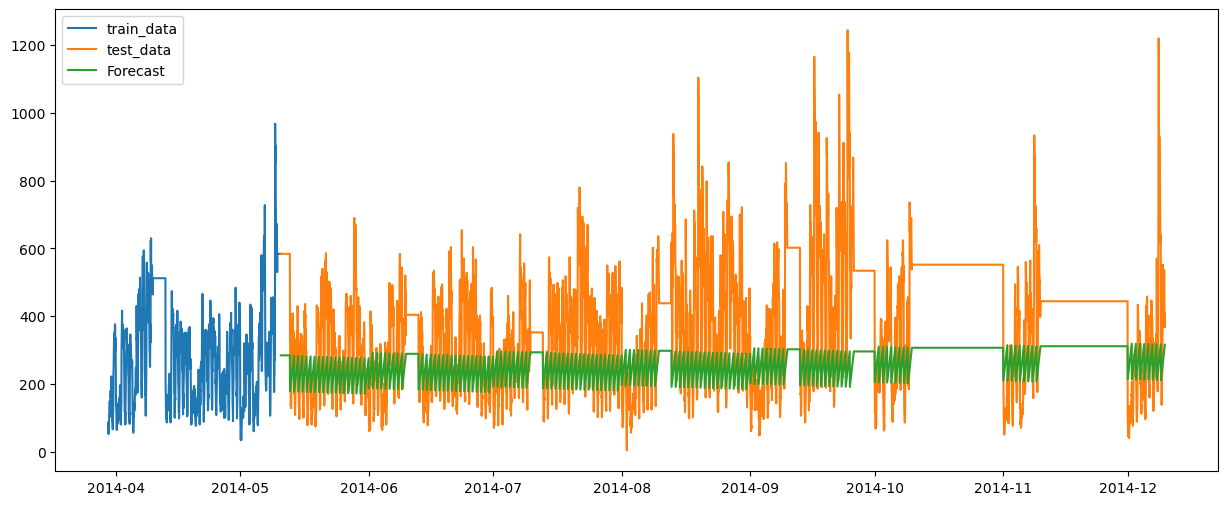

In [49]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index[-1000:],y_train.values[-1000:], label='train_data')
plt.plot(y_test.index,y_test.values, label='test_data')
plt.plot(y_test.index,pred, label='Forecast')
plt.legend(loc='best')
plt.show()

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
y_train, y_test, X_train, X_test = temporal_train_test_split(y, train_all[['year', 'month', 'day', 'hour']], test_size=.2)

In [52]:
rf = RandomForestRegressor(n_estimators=500, max_depth=8, min_samples_split=10)

In [53]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=10, n_estimators=500)

In [54]:
rf.score(X_train, y_train)

0.9137892203370992

In [55]:
rf.score(X_test, y_test)

0.14098639085000064

In [56]:
pred = rf.predict(X_test)

In [57]:
mean_squared_error(y_test, pred, squared=False)

155.9677482086308

In [58]:
rf.feature_importances_

array([0.58225378, 0.04951218, 0.1840858 , 0.18414823])

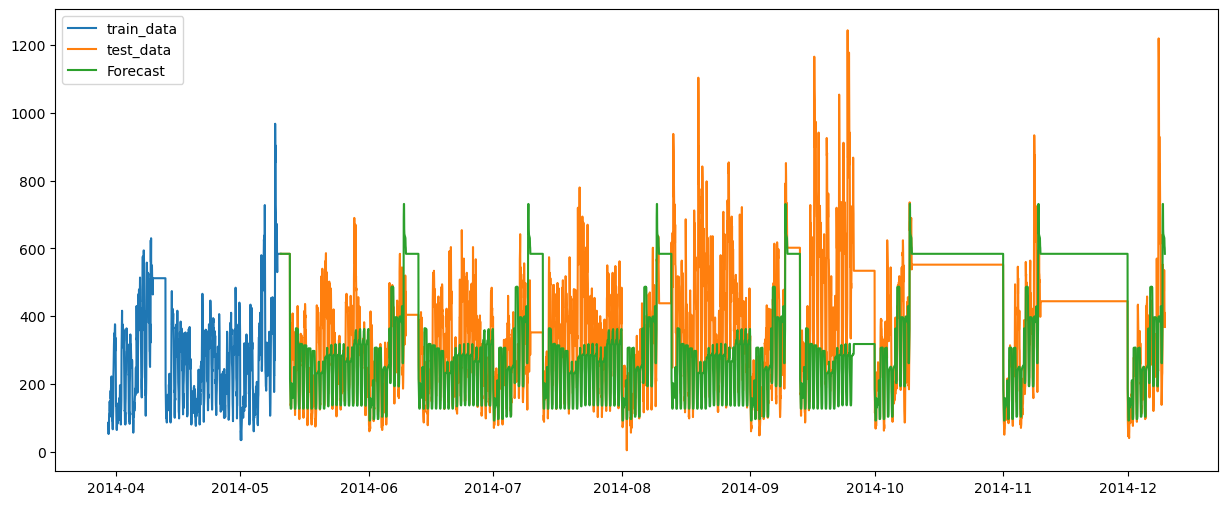

In [59]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index[-1000:],y_train.values[-1000:], label='train_data')
plt.plot(y_test.index,y_test.values, label='test_data')
plt.plot(y_test.index,pred, label='Forecast')
plt.legend(loc='best')
plt.show()

# Naive

In [60]:
from sktime.forecasting.naive import NaiveForecaster

In [61]:
naive = NaiveForecaster(strategy='mean', window_length=15)

In [62]:
naive.fit(y_train, fh=fh)

NaiveForecaster(strategy='mean', window_length=15)

In [63]:
y_train.index.freq = 'H'

In [64]:
pred = naive.predict(fh=fh)

In [65]:
mean_squared_error(y_test, pred, squared=False)

267.186025257728

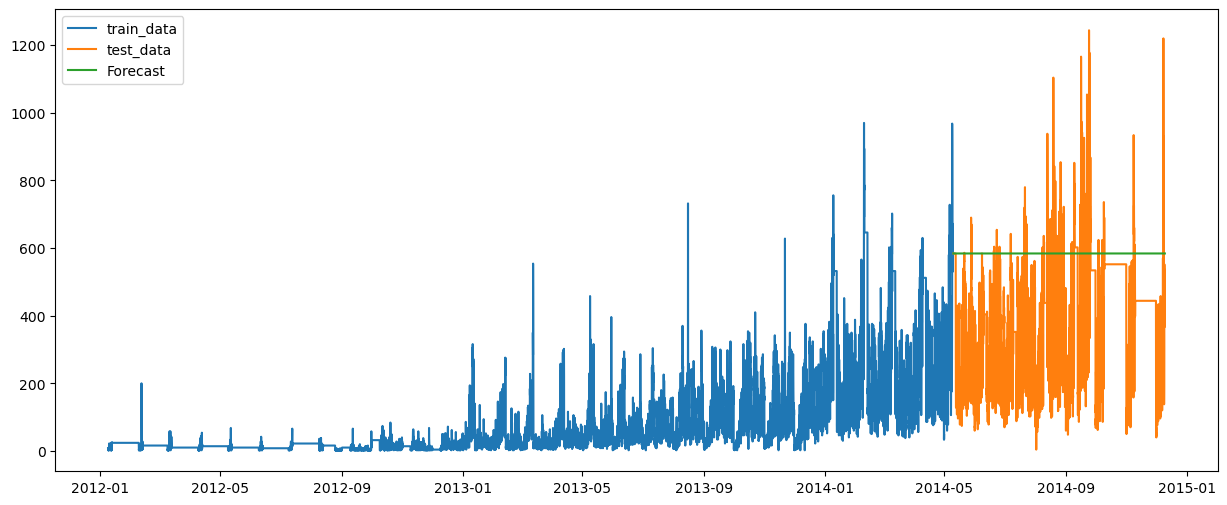

In [66]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index,y_train.values, label='train_data')
plt.plot(y_test.index,y_test.values, label='test_data')
plt.plot(y_test.index,pred, label='Forecast')
plt.legend(loc='best')
# plt.title("Weighted Moving Average Method")
plt.show()

# Exponential Smoothing

In [67]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [68]:
es = ExponentialSmoothing(trend=None, seasonal='add', sp=24, smoothing_trend=.3, smoothing_seasonal=.3)

In [69]:
es.fit(y_train)

ExponentialSmoothing(seasonal='add', smoothing_seasonal=0.3,
                     smoothing_trend=0.3, sp=24)

In [70]:
pred = es.predict(fh=fh)

In [71]:
mean_squared_error(y_test, pred, squared=False)

213.1420120847122

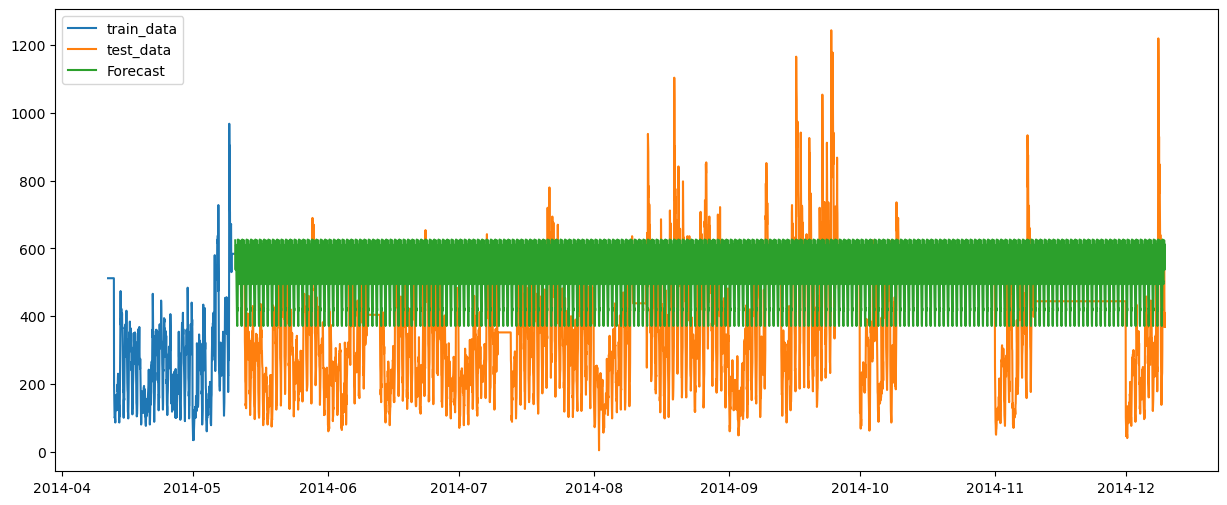

In [72]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index[-700:],y_train.values[-700:], label='train_data')
plt.plot(y_test.index,y_test.values, label='test_data')
plt.plot(y_test.index,pred, label='Forecast')
plt.legend(loc='best')
# plt.title("Weighted Moving Average Method")
plt.show()

# ARIMA

In [73]:
from scipy.stats import boxcox

In [74]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [75]:
from sktime.utils.plotting import plot_correlations

In [76]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

In [128]:
adfuller(train_all['Count'])

(-5.233217417313464,
 7.518130600301419e-06,
 48,
 25535,
 {'1%': -3.430606117387666,
  '5%': -2.8616531962354825,
  '10%': -2.566830251028231},
 249833.39677244672)

In [139]:
adfuller(train_all['Count'].diff().dropna())

(-28.28266017798344,
 0.0,
 48,
 25534,
 {'1%': -3.4306061274191197,
  '5%': -2.861653200668894,
  '10%': -2.566830253388039},
 249775.66135322407)

In [129]:
train_all

,ID,Count,year,month,day,hour
2012-01-09 00:00:00,168.0,8.0,2012.0,1.0,9.0,0.0
2012-01-09 01:00:00,169.0,4.0,2012.0,1.0,9.0,1.0
2012-01-09 02:00:00,170.0,4.0,2012.0,1.0,9.0,2.0
2012-01-09 03:00:00,171.0,2.0,2012.0,1.0,9.0,3.0
2012-01-09 04:00:00,172.0,2.0,2012.0,1.0,9.0,4.0
...,...,...,...,...,...,...
2014-12-09 19:00:00,17971.0,536.0,2014.0,12.0,9.0,19.0
2014-12-09 20:00:00,17972.0,484.0,2014.0,12.0,9.0,20.0
2014-12-09 21:00:00,17973.0,368.0,2014.0,12.0,9.0,21.0
2014-12-09 22:00:00,17974.0,410.0,2014.0,12.0,9.0,22.0


In [130]:
decompose = seasonal_decompose(train_all['Count'])

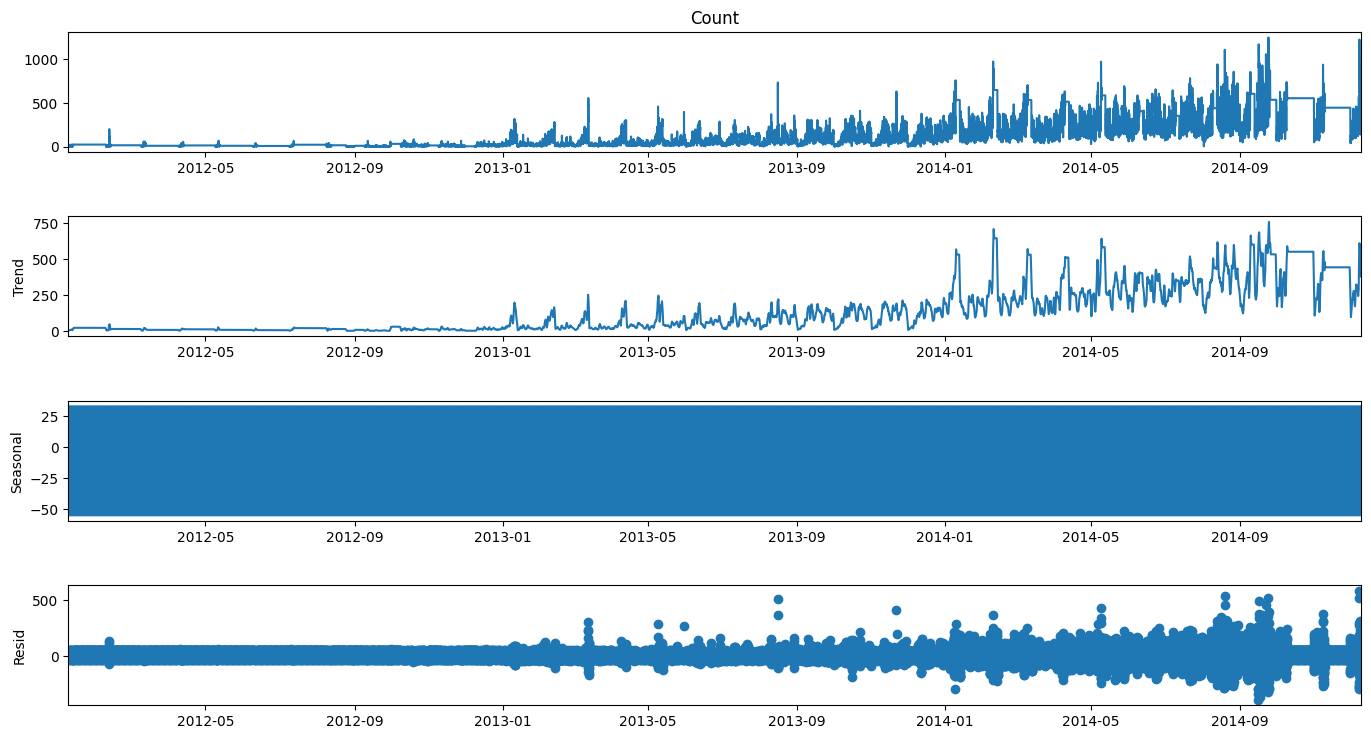

In [131]:
fig = decompose.plot()
fig.set_size_inches(15,8)

<AxesSubplot: >

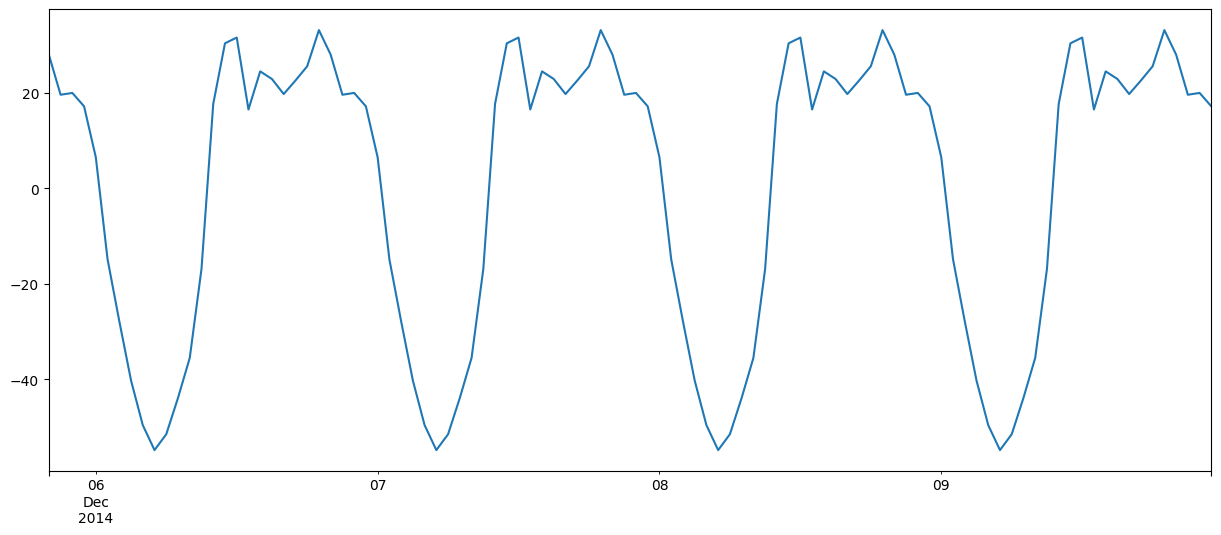

In [132]:
decompose.seasonal[-100:].plot(figsize=(15,6))

<AxesSubplot: >

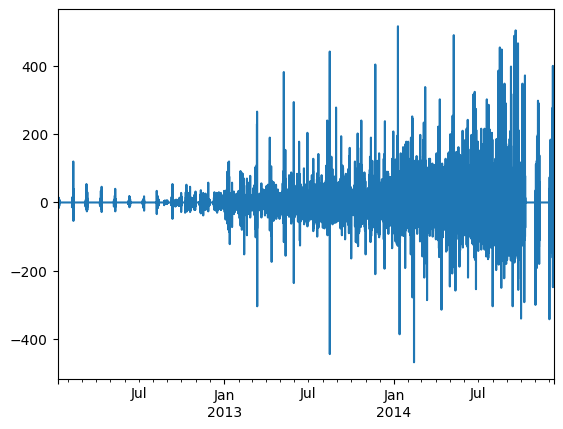

In [133]:
train_all['Count'].diff(1).plot()

In [135]:
test.reindex(pd.date_range(test['Datetime'].min(), test['Datetime'].max(), freq='H'))

,ID,Datetime,year,month,day,hour
2014-01-10 00:00:00,NaN,NaT,NaN,NaN,NaN,NaN
2014-01-10 01:00:00,NaN,NaT,NaN,NaN,NaN,NaN
2014-01-10 02:00:00,NaN,NaT,NaN,NaN,NaN,NaN
2014-01-10 03:00:00,NaN,NaT,NaN,NaN,NaN,NaN
2014-01-10 04:00:00,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2015-12-04 19:00:00,NaN,NaT,NaN,NaN,NaN,NaN
2015-12-04 20:00:00,NaN,NaT,NaN,NaN,NaN,NaN
2015-12-04 21:00:00,NaN,NaT,NaN,NaN,NaN,NaN
2015-12-04 22:00:00,NaN,NaT,NaN,NaN,NaN,NaN


(<Figure size 1200x800 with 3 Axes>,
 array([<AxesSubplot: ylabel='Count'>,
        <AxesSubplot: title={'center': 'Autocorrelation'}>,
        <AxesSubplot: title={'center': 'Partial Autocorrelation'}>],
       dtype=object))

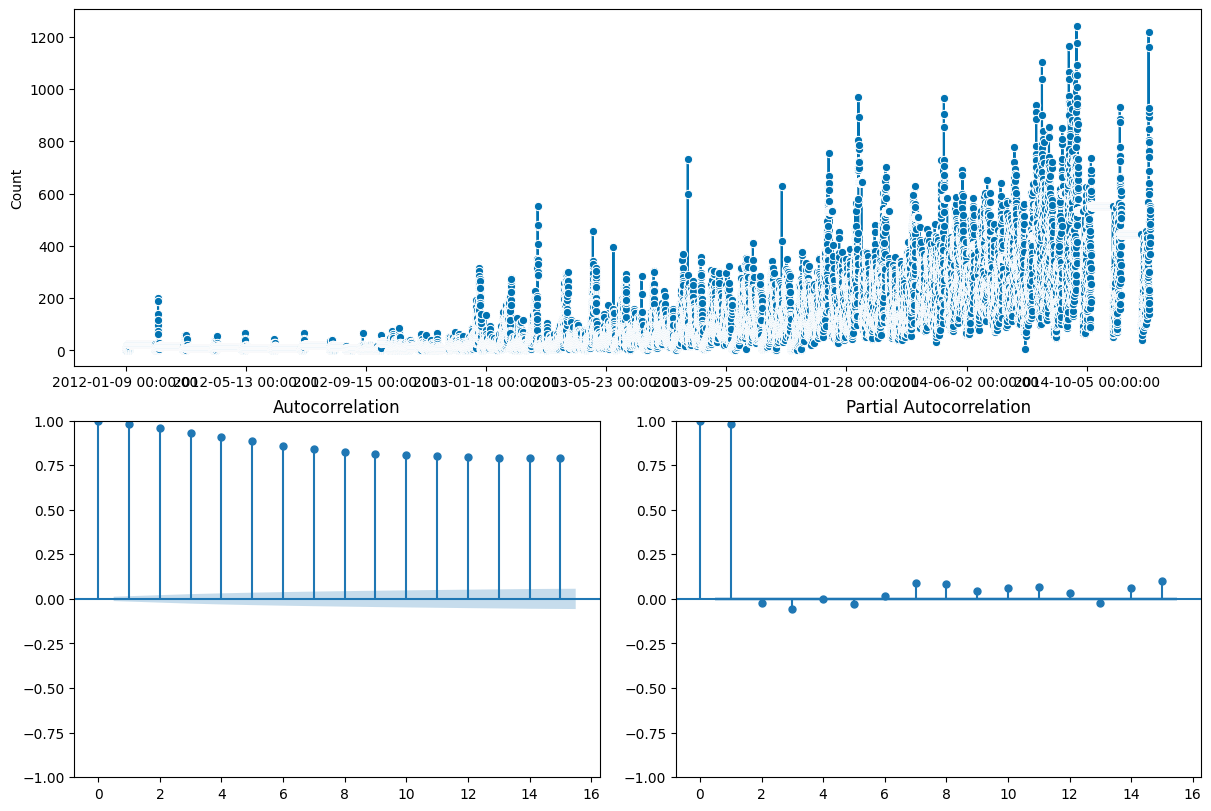

In [136]:
plot_correlations(train_all['Count'], lags=15)

(<Figure size 1200x800 with 3 Axes>,
 array([<AxesSubplot: ylabel='Count'>,
        <AxesSubplot: title={'center': 'Autocorrelation'}>,
        <AxesSubplot: title={'center': 'Partial Autocorrelation'}>],
       dtype=object))

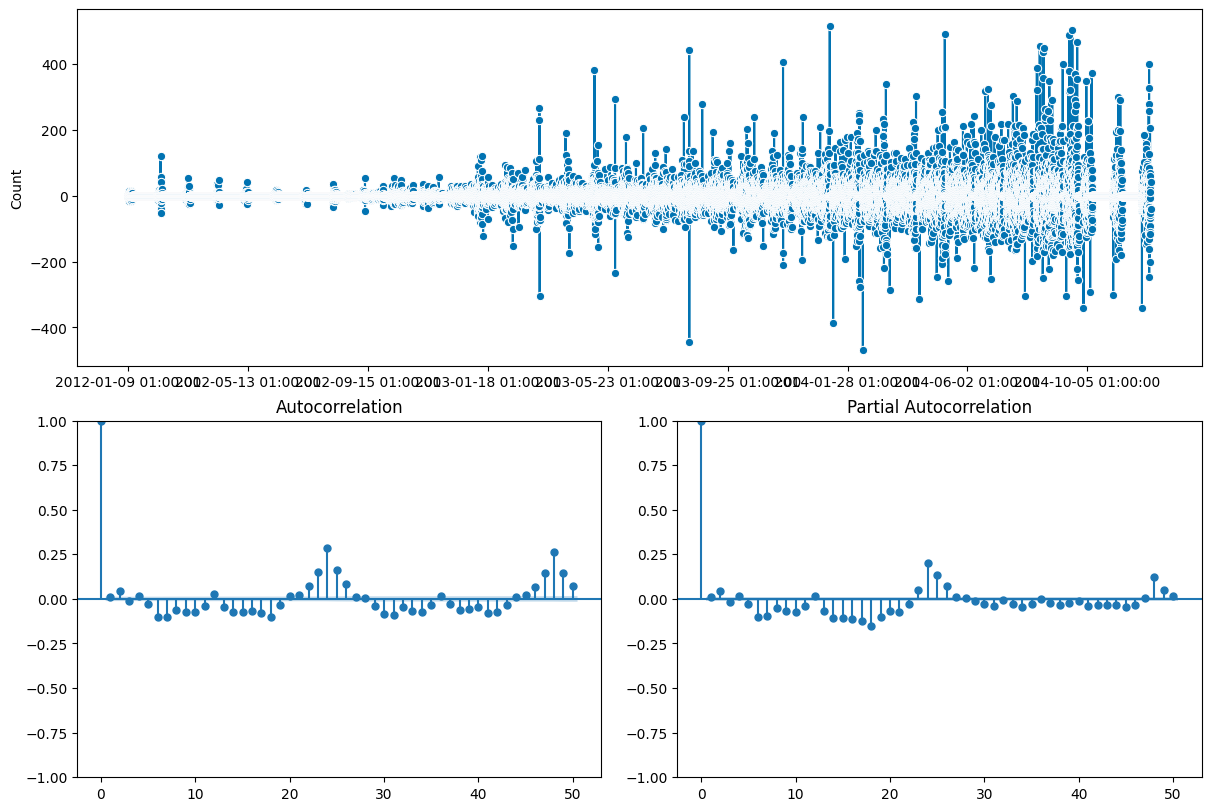

In [137]:
plot_correlations(train_all['Count'].diff().dropna(), lags=50)

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Count'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

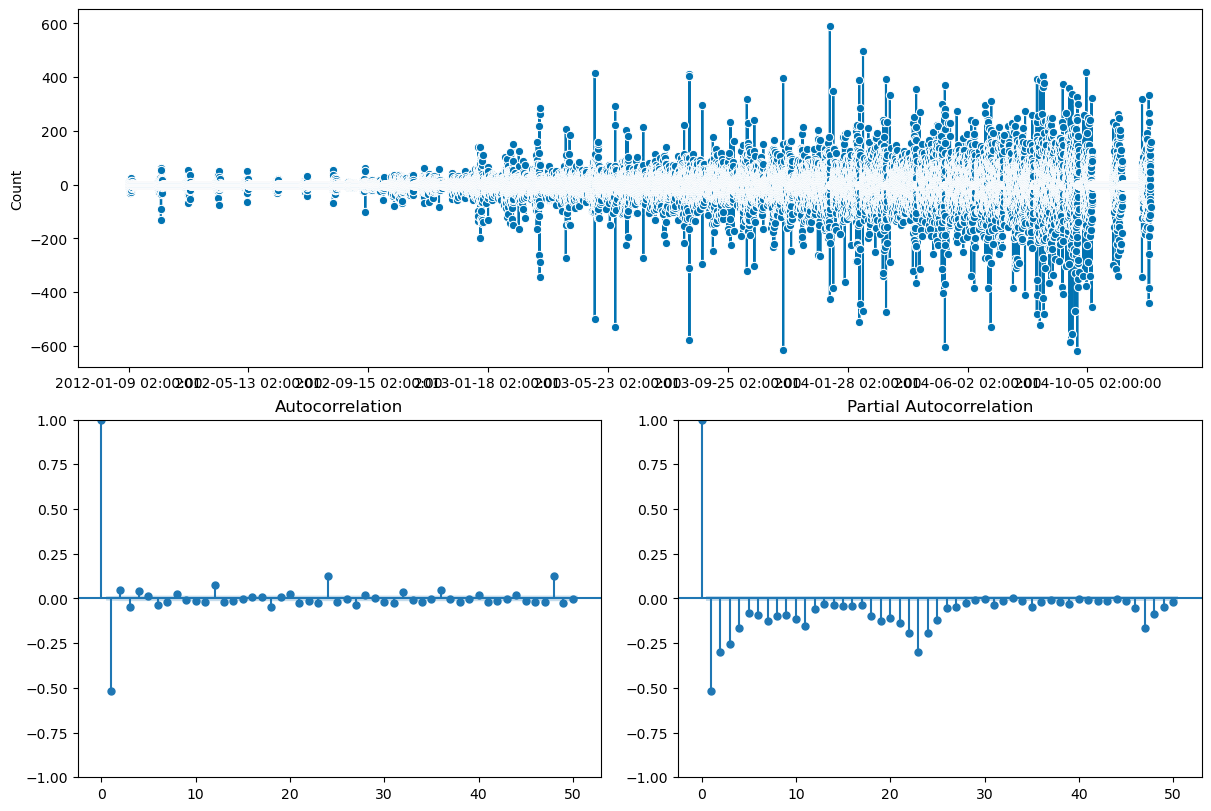

In [88]:
plot_correlations(train_all['Count'].diff().diff().dropna(), lags=50)

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Count'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

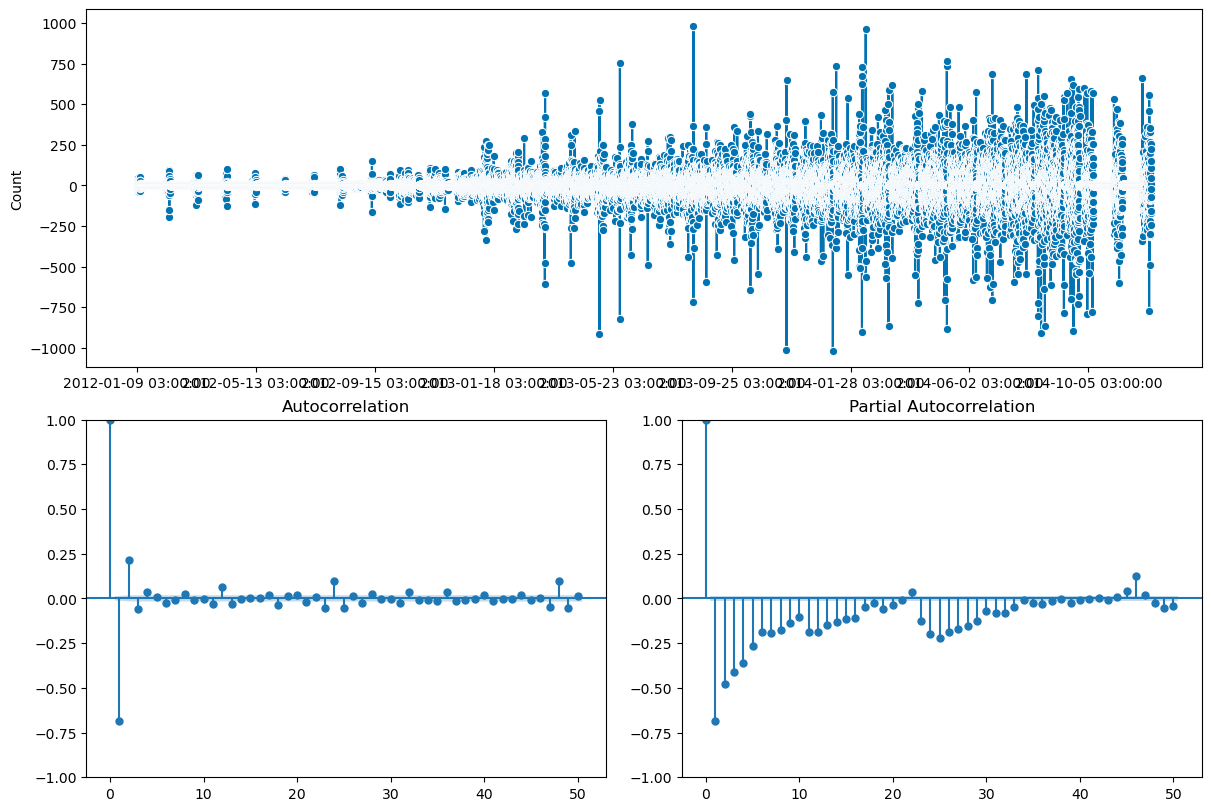

In [89]:
plot_correlations(train_all['Count'].diff().diff().diff().dropna(), lags=50)

In [150]:
arima = ARIMA(order=(1,1,1),seasonal_order=(1,0,1,24), maxiter=300)

In [151]:
arima.fit(y_train)

ARIMA(maxiter=300, order=(1, 1, 1), seasonal_order=(1, 0, 1, 24))

In [152]:
pred = arima.predict(fh=fh)

In [153]:
mean_squared_error(y_test, pred, squared=False)

961.4836291685104

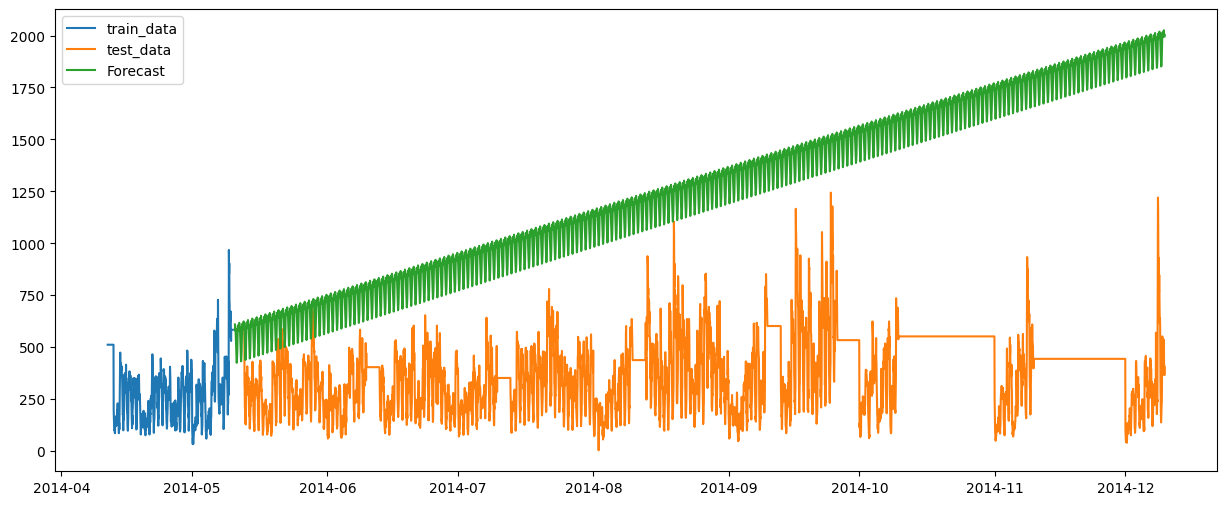

In [154]:
plt.figure(figsize=(15,6))
plt.plot(y_train.index[-700:], y_train.values[-700:], label='train_data')
plt.plot(y_test.index, y_test.values, label='test_data')
plt.plot(y_test.index, pred, label='Forecast')
plt.legend(loc='best')
# plt.title("Weighted Moving Average Method")
plt.show()

# Predictions for test

In [77]:
test

,ID,Datetime,year,month,day,hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4
...,...,...,...,...,...,...
5107,23395,2015-04-26 19:00:00,2015,4,26,19
5108,23396,2015-04-26 20:00:00,2015,4,26,20
5109,23397,2015-04-26 21:00:00,2015,4,26,21
5110,23398,2015-04-26 22:00:00,2015,4,26,22


In [78]:
test.columns

Index(['ID', 'Datetime', 'year', 'month', 'day', 'hour'], dtype='object')

In [79]:
predictions = rf.predict(test[['year', 'month', 'day', 'hour']])

In [80]:
predictions

array([250.95284164, 226.03944415, 176.21343858, ..., 276.10224053,
       276.26157387, 307.97965707])

In [81]:
result = pd.DataFrame({'ID':test['ID'], 'Count':predictions})
result

,ID,Count
0,18288,250.952842
1,18289,226.039444
2,18290,176.213439
3,18291,158.235514
4,18292,137.155990
...,...,...
5107,23395,275.445329
5108,23396,275.985517
5109,23397,276.102241
5110,23398,276.261574


In [82]:
result[result['Count'] < 0].index

Int64Index([], dtype='int64')

In [83]:
result['Count'].mean()

240.32335261317627

In [86]:
result.to_csv('\submission.csv', index=False)